# Python List Comprehension
We'll be going over list comprehension: what it is, how to use it, when to use it, and when not to use it. We'll also go over some basic list data structure foundation so we can better understand what's happening under the hood.

## Getting Started - List review
Lists are a data structure commonly used in Python.

> From Wikipedia - a data structure is a data organization, management, and storage format that enables efficient access and modification

### Declaring a list

In [1]:
a = []
b = list()
c= list([])

In [2]:
print a
print b
print c

[]
[]
[]


### Reminder - These lists are stored in memory. You can find their memory address using the "id" keyword

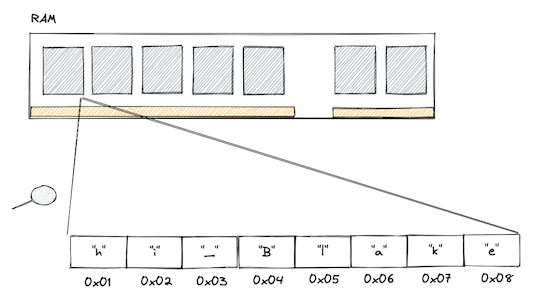

In [3]:
print hex(id(a))
print hex(id(b))
print hex(id(c))

0x7fe5cf721af0
0x7fe5cf721cd0
0x7fe5cf721d70


### Appending to a list

In [4]:
a.append('1')  # use built in list method "append"
b += ['1']     # use addition assignment operator ("+=")
c = c + ['1']  # concatenate using addition operator ("+")

In [5]:
print a
print b
print c

['1']
['1']
['1']


In [6]:
print hex(id(a))
print hex(id(b))
print hex(id(c))

0x7fe5cf721af0
0x7fe5cf721cd0
0x7fe5cf7fb3c0


### Creating random list 

In [7]:
def list_append():
    range_nums = range(10000)
    _list = []
    for i in range_nums:
        _list.append(i)
        
def list_assig_add():
    range_nums = range(10000)
    _list = []
    for i in range_nums:
        _list += [i]
        
def list_concat():
    range_nums = range(10000)
    _list = []
    for i in range_nums:
        _list = _list + [i]

In [8]:
%timeit list_append()

1000 loops, best of 3: 1.48 ms per loop


In [9]:
%timeit list_assig_add()

1000 loops, best of 3: 2.06 ms per loop


In [10]:
%timeit list_concat()

1 loop, best of 3: 411 ms per loop


### List Comprehension
List comprehension is another way to create a list, without using an explicit for loop. This often helps to make code more concise, but also provides some efficiencies as well.

In [11]:
def list_comprehension():
    range_nums = range(10000)
    _list = [i for i in range_nums]

In [12]:
%timeit list_comprehension()

1000 loops, best of 3: 706 µs per loop


### How do they all compare?

In [14]:
programs = [
('list_concat', """
range_nums = range(10)
_list = []
for i in range_nums:
    _list = _list + [i]  
"""),
    
    ('list_append', """
range_nums = range(10)
_list = []
for i in range_nums:
    _list.append(i)  
"""),
    
    ('list_comprehension', """
range_nums = range(10)
_list = [i for i in range_nums]    
""")
]

In [15]:
import timeit
import dis 
for name, text in programs:
    print name, timeit.Timer(stmt=text).timeit()
    code = compile(text, '<string>', 'exec')
    dis.disassemble(code)
    print
    print

list_concat 3.67785716057
  2           0 LOAD_NAME                0 (range)
              3 LOAD_CONST               0 (10)
              6 CALL_FUNCTION            1
              9 STORE_NAME               1 (range_nums)

  3          12 BUILD_LIST               0
             15 STORE_NAME               2 (_list)

  4          18 SETUP_LOOP              27 (to 48)
             21 LOAD_NAME                1 (range_nums)
             24 GET_ITER            
        >>   25 FOR_ITER                19 (to 47)
             28 STORE_NAME               3 (i)

  5          31 LOAD_NAME                2 (_list)
             34 LOAD_NAME                3 (i)
             37 BUILD_LIST               1
             40 BINARY_ADD          
             41 STORE_NAME               2 (_list)
             44 JUMP_ABSOLUTE           25
        >>   47 POP_BLOCK           
        >>   48 LOAD_CONST               1 (None)
             51 RETURN_VALUE        


list_append 2.29269695282
  2          

### Diving into the dissasembly...
<details>
    <summary> >> Click Here: What's going on under the hood </summary>
  
#### list_concat:
```
        >>   25 FOR_ITER                19 (to 47)
             28 STORE_NAME               3 (i)

  5          31 LOAD_NAME                2 (_list)
             34 LOAD_NAME                3 (i)
             37 BUILD_LIST               1
             40 BINARY_ADD          
             41 STORE_NAME               2 (_list)
             44 JUMP_ABSOLUTE           25
        >>   47 POP_BLOCK           
```
We can see that a new `BUILD_LIST` call is made for every call in the loop, causing the largest inefficiencies in the concat method of list building

#### list_append
```
        >>   25 FOR_ITER                19 (to 47)
             28 STORE_NAME               3 (i)

  5          31 LOAD_NAME                2 (_list)
             34 LOAD_ATTR                4 (append)
             37 LOAD_NAME                3 (i)
             40 CALL_FUNCTION            1
             43 POP_TOP             
             44 JUMP_ABSOLUTE           25
        >>   47 POP_BLOCK           
```
We see a call to `LOAD_ATTR (append) -> LOAD_NAME -> CALL_FUNCTION -> POP_TOP` as the three byte code calls to append to the list.

#### list_comprehension
```
        >>   19 FOR_ITER                12 (to 34)
             22 STORE_NAME               2 (i)
             25 LOAD_NAME                2 (i)
             28 LIST_APPEND              2
             31 JUMP_ABSOLUTE           19
        >>   34 STORE_NAME               3 (_list)
```
List comprehension only requres the `LIST_APPEND` byte code call. In the context of list comprehension the Python interpreter knows that it will be appending to the list and can optimize.
</details>

**List comprehension is the fastest way to create a list however there are still reasons to avoid this sometimes**
Example: fizzbuzz
```
Write a short program that prints each number from 1 to 100 on a new line. 
- For each multiple of 3, print "Fizz" instead of the number. 
- For each multiple of 5, print "Buzz" instead of the number. 
- For numbers which are multiples of both 3 and 5, print "FizzBuzz" instead of the number.
```

In [16]:
def fizzbuzz():
    for i in range(1, 101):
        if i % 3 == 0 and i % 5 == 0:
            print 'FizzBuzz'
        elif i % 3 == 0:
            print 'Fizz'
        elif i % 5 == 0:
            print 'Buzz'
        else:
            print i

In [17]:
fizzbuzz()

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
FizzBuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
FizzBuzz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
FizzBuzz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
FizzBuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
Buzz


In [18]:
print '\n'.join([
    "Fizz"*(not i % 3) + "Buzz"*(not i % 5) or str(i) for i in range(1, 101)
])

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
FizzBuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
FizzBuzz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
FizzBuzz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
FizzBuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
Buzz


### Often clarity is more important than subtle optimizations. 
> “Any fool can write code that a computer can understand. Good programmers write code that humans can understand.” - Martin Fowler

# Remember: this

In [19]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
